## **Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('global_ai_ml_data_salaries.csv', encoding='latin-1')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Business Intelligence,84021,USD,84021,CA,0,CA,M
1,2024,MI,FT,Business Intelligence,69000,USD,69000,CA,0,CA,M
2,2024,SE,FT,BI Developer,241600,USD,241600,US,0,US,M
3,2024,SE,FT,BI Developer,109800,USD,109800,US,0,US,M
4,2024,SE,FT,Machine Learning Modeler,245400,USD,245400,US,100,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19775 entries, 0 to 19774
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           19775 non-null  int64 
 1   experience_level    19775 non-null  object
 2   employment_type     19775 non-null  object
 3   job_title           19775 non-null  object
 4   salary              19775 non-null  int64 
 5   salary_currency     19775 non-null  object
 6   salary_in_usd       19775 non-null  int64 
 7   employee_residence  19775 non-null  object
 8   remote_ratio        19775 non-null  int64 
 9   company_location    19775 non-null  object
 10  company_size        19775 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.7+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,19775.000000,1.977500e+04,19775.000000,19775.000000
mean,2023.353527,1.628728e+05,150935.295322,29.886220
std,0.712468,3.128112e+05,68561.127186,45.427765
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.039770e+05,103200.000000,0.000000
50%,2023.000000,1.430000e+05,142200.000000,0.000000
75%,2024.000000,1.900000e+05,189650.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [8]:
df.employment_type.unique()

array(['FT', 'PT', 'CT', 'FL'], dtype=object)

In [9]:
df.job_title.unique()

array(['Business Intelligence', 'BI Developer',
       'Machine Learning Modeler', 'Data Analyst',
       'Machine Learning Engineer', 'Research Engineer',
       'Research Scientist', 'Head of Data', 'Data Scientist',
       'AI Engineer', 'Research Analyst', 'Applied Scientist',
       'Data Engineer', 'Data Manager', 'Data Architect', 'ETL Developer',
       'Business Intelligence Analyst', 'Business Intelligence Engineer',
       'Data Management Analyst', 'Data Management Manager',
       'Data Management Specialist', 'ETL Engineer',
       'Data Visualization Engineer', 'Data Visualization Specialist',
       'Data Specialist', 'Analytics Engineer', 'Data Analytics Lead',
       'Data Strategist', 'Data Analytics Manager',
       'Machine Learning Quality Engineer',
       'Business Intelligence Developer', 'Data Quality Engineer',
       'Data Product Manager', 'Principal Statistical Programmer',
       'Business Intelligence Lead', 'Data Product Owner',
       'Computer Vision 

In [10]:
df.salary_currency.unique()

array(['USD', 'EUR', 'GBP', 'ZAR', 'CAD', 'SEK', 'PLN', 'INR', 'DKK',
       'ILS', 'BRL', 'CHF', 'NZD', 'AUD', 'PHP', 'TRY', 'NOK', 'JPY',
       'HKD', 'SGD', 'THB', 'HUF', 'MXN', 'CLP'], dtype=object)

In [11]:
df.employee_residence.unique()

array(['CA', 'US', 'NL', 'AU', 'GB', 'ZA', 'IE', 'TR', 'IL', 'IN', 'FI',
       'DE', 'LU', 'KE', 'RS', 'PT', 'AR', 'NZ', 'UA', 'LT', 'FR', 'ES',
       'SE', 'MX', 'PL', 'DK', 'LV', 'GE', 'AT', 'HR', 'BR', 'CH', 'AE',
       'GR', 'SA', 'EG', 'PH', 'OM', 'BA', 'IT', 'EE', 'MT', 'LB', 'RO',
       'HU', 'VN', 'NG', 'CZ', 'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH',
       'KR', 'QA', 'RU', 'TN', 'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO',
       'UZ', 'JP', 'HK', 'CF', 'SG', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR',
       'CL', 'PR', 'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE'],
      dtype=object)

In [12]:
df.company_location.unique()

array(['CA', 'US', 'NL', 'AU', 'GB', 'ZA', 'IE', 'TR', 'IL', 'IN', 'FI',
       'DE', 'LU', 'KE', 'RS', 'PT', 'AR', 'GR', 'NZ', 'UA', 'LT', 'FR',
       'ES', 'SE', 'MX', 'PL', 'DK', 'LV', 'AT', 'BR', 'CH', 'AE', 'SA',
       'EG', 'PH', 'OM', 'BA', 'IT', 'AS', 'EE', 'MT', 'HU', 'LB', 'RO',
       'VN', 'NG', 'GI', 'CO', 'SI', 'MU', 'RU', 'KR', 'CZ', 'QA', 'GH',
       'AD', 'EC', 'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK',
       'IR', 'BS', 'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL',
       'MD'], dtype=object)

In [13]:
df.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

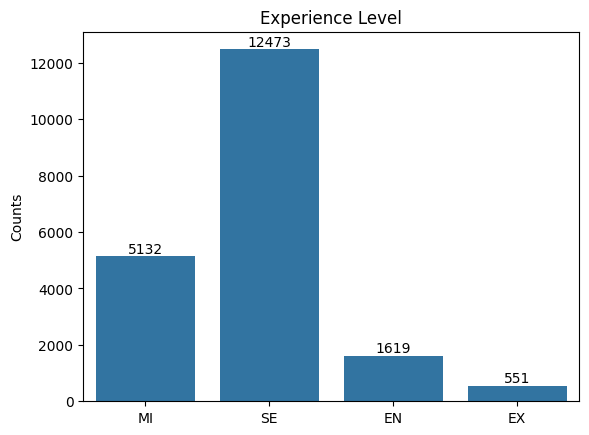

In [14]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = df, x = df.experience_level)
ax.set(xlabel='', ylabel='Counts', title='Experience Level')
ax.bar_label(ax.containers[0]);

<ipython-input-17-5f641fa71bbc>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


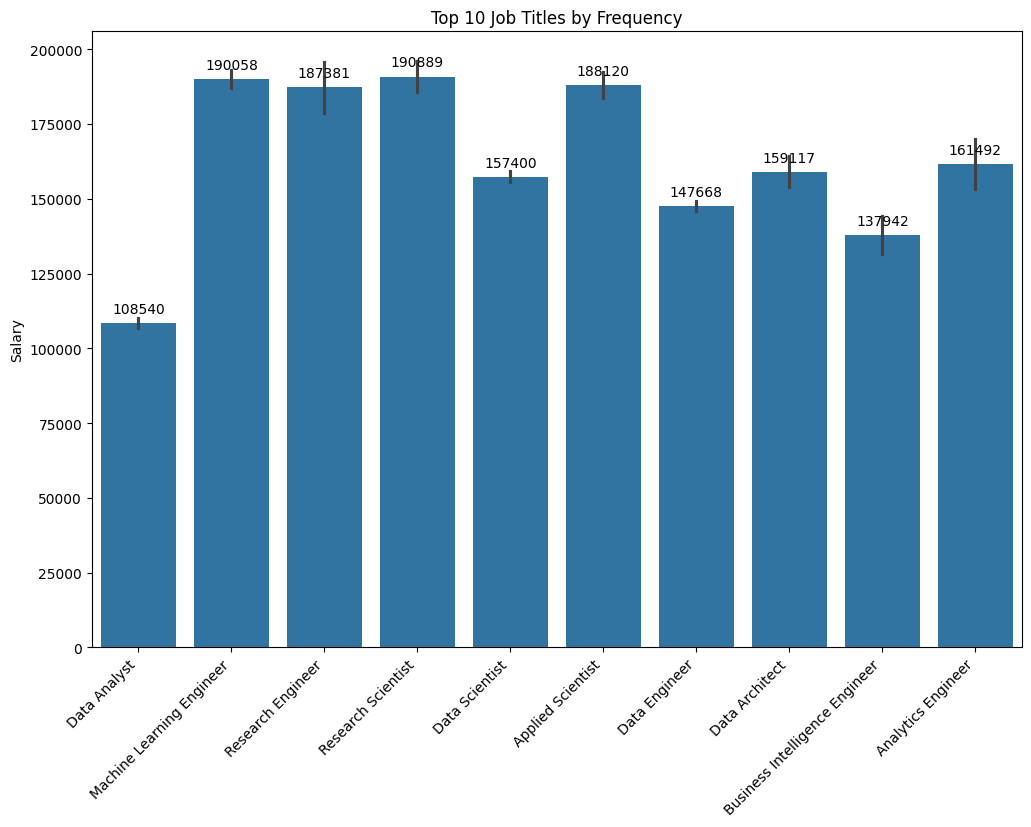

In [17]:
job_counts = df['job_title'].value_counts()
top_10_jobs = job_counts.head(10).index
df_top_10 = df[df['job_title'].isin(top_10_jobs)]
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(ax=ax, data=df_top_10, x='job_title', y='salary_in_usd')
ax.set(xlabel='', ylabel='Salary', title='Top 10 Job Titles by Frequency')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container, padding=5);
plt.show()

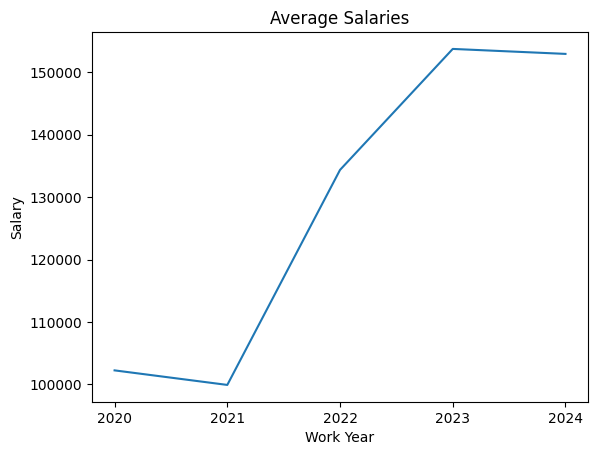

In [18]:
salary=df['salary_in_usd'].groupby(df['work_year']).mean()
plt.title("Average Salaries")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023','2024'],y=salary)
plt.show()

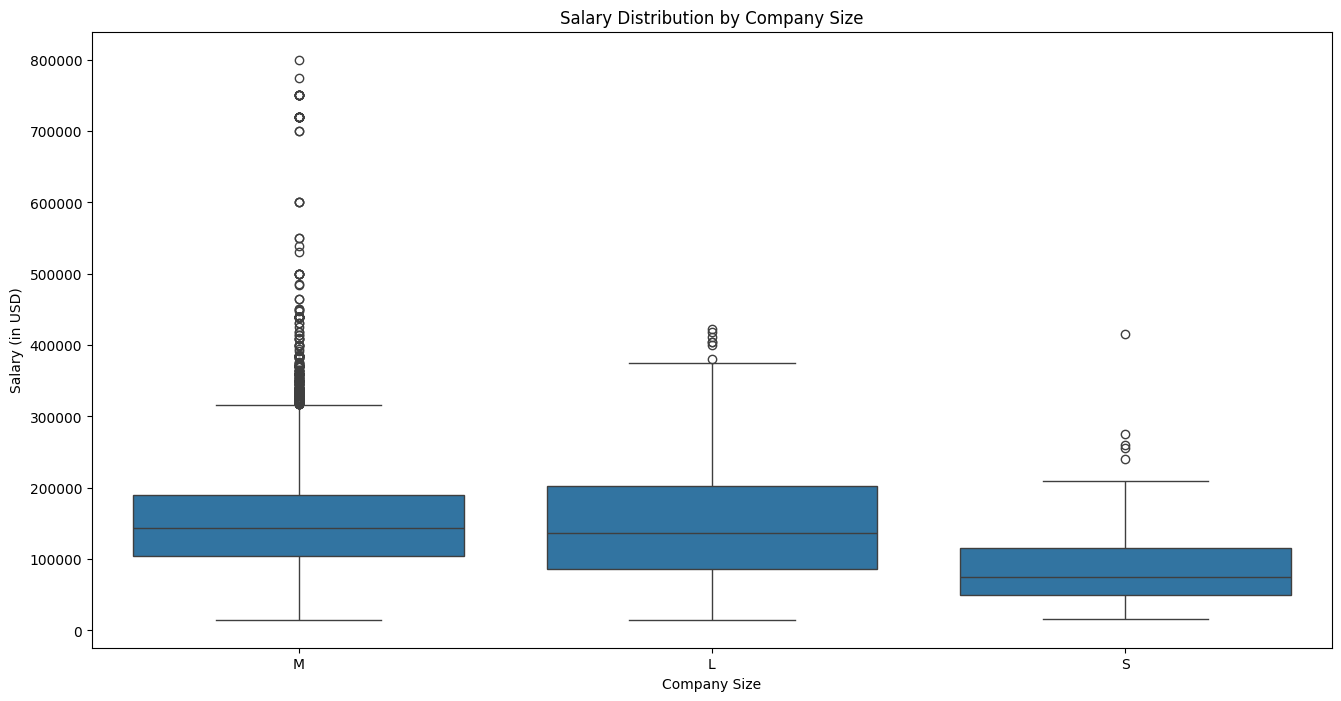

In [19]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.xlabel('Company Size')
plt.ylabel('Salary (in USD)')
plt.title('Salary Distribution by Company Size')
plt.show()

# **Preparing the data**



In [21]:
train, test = train_test_split(df, test_size = 0.2, shuffle = True, random_state = 1)

In [22]:
categorical_values = [['EN','MI', 'SE', 'EX'],['S', 'M', 'L'],['FT', 'PT', 'CT', 'FL']]
oe = OrdinalEncoder(categories = categorical_values)
train[['experience_level', 'company_size','employment_type']] = oe.fit_transform(train[['experience_level', 'company_size','employment_type']])
train.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16219,2023,2.0,0.0,Data Scientist,160000,USD,160000,US,0,US,1.0
13941,2023,2.0,0.0,Machine Learning Engineer,228830,USD,228830,US,0,US,1.0
10054,2023,2.0,0.0,Data Engineer,121700,USD,121700,US,100,US,1.0
553,2024,2.0,0.0,Data Analyst,106400,USD,106400,US,0,US,2.0
17543,2023,2.0,0.0,Data Engineer,90000,USD,90000,US,100,US,1.0


In [23]:
columns = ['job_title', 'salary_currency', 'company_location', 'employee_residence']
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoded_features = pd.DataFrame(ohe.fit_transform(train[columns]),columns = ohe.get_feature_names_out(columns))
encoded_features.index = train.index
train = train.drop(columns, axis = 1)
train = pd.concat([train, encoded_features], axis = 1)
train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,work_year,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,...,employee_residence_SI,employee_residence_TH,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_UG,employee_residence_US,employee_residence_UZ,employee_residence_VN,employee_residence_ZA
16219,2023,2.0,0.0,160000,160000,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13941,2023,2.0,0.0,228830,228830,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10054,2023,2.0,0.0,121700,121700,100,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
553,2024,2.0,0.0,106400,106400,0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17543,2023,2.0,0.0,90000,90000,100,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,2023,2.0,0.0,187000,187000,100,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17289,2023,2.0,0.0,48000,51824,100,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5192,2024,1.0,0.0,85000,85000,100,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12172,2023,2.0,0.0,125000,125000,100,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
X, y = train.drop(['salary_in_usd', 'salary'], axis = 1), train['salary_in_usd']

In [25]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
splits = list(cv.split(X,y))

In [27]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

models = [('Linear Regression', LinearRegression()),('Lasso', Lasso()),('Ada Boost', AdaBoostRegressor(random_state=1))]

for name, model in models:
    scores = []
    for train_index, val_index in splits:
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred)
        scores.append(rmse)
    mean_score = np.mean(scores)
    print(f'{name} Mean RMSE = {mean_score:.2f}')

Linear Regression Mean RMSE = 149406208634116746411769856.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.835e+10, tolerance: 5.879e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e+10, tolerance: 5.800e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+11, tolerance: 5.885e

Lasso Mean RMSE = 3199714546.60
Ada Boost Mean RMSE = 4188776312.97


### **Lasso is the best model with the least RMSE among the three.**